In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py


In [62]:
# Specify value of m
m = 565  # Number of fluid iterations of the simulation
mass = np.zeros(m)
temperature = np.zeros(m)
XO2 = np.zeros(m)
XCH4 = np.zeros(m)
XH20 = np.zeros(m)
XCO2 = np.zeros(m)
pressure = np.zeros(m)
min_dot = np.zeros(m)
mout_dot = np.zeros(m)
tin_dot = np.zeros(m)
tout_dot = np.zeros(m)
start = 0
end = 1000  # Original value of 252
W = 500  # temp value

for i in range(m):
    if (i < 100):
        f = h5py.File(r'C:\Users\Michael\Desktop\data\sample0\fluid_iter000000' + "{:02d}".format(i) + r'00\0,0,0-751,251,0.hdf', 'r')
    else:
        f = h5py.File(r'C:\Users\Michael\Desktop\data\sample0\fluid_iter00000' + "{:02d}".format(i) + r'00\0,0,0-751,251,0.hdf', 'r')
    cells = f['cellWidth'][0, :,:]
    volumes = cells[:,:,1] * cells[:,:,2]
    volumes_3d = cells[:,:,1] * cells[:,:,2] * cells[:,:,0]
    mass[i] = np.sum(f['rho'][0,:,:] * volumes_3d)
    temperature[i] = np.sum(f['temperature'][0,:,:] * volumes_3d) / np.sum(volumes_3d)
    pressure[i] = np.sum(f['pressure'][0,:,:] * volumes_3d) / np.sum(volumes_3d)
    # Reshaping array of size 189504 into shape (252, 752, 1), where end = 252
    mass_frac = (f['MolarFracs'][0, :, :][:, :, :] * W) / np.reshape(np.sum(f['MolarFracs'][0, :, :][:, :, :] * W, axis = 2), (252, 752, 1))
    XO2[i] = np.sum(mass_frac[:, :, 1] * f['rho'][0,:,:] * volumes_3d) / np.sum(f['rho'][0,:,:] * volumes_3d)
    XCH4[i] = np.sum(mass_frac[:, :, 0] * f['rho'][0,:,:] * volumes_3d) / np.sum(f['rho'][0,:,:] * volumes_3d)
    XH20[i] = np.sum(mass_frac[:, :, 3] * f['rho'][0,:,:] * volumes_3d) / np.sum(f['rho'][0,:,:] * volumes_3d)
    XCO2[i] = np.sum(mass_frac[:, :, 2] * f['rho'][0,:,:] * volumes_3d) / np.sum(f['rho'][0,:,:] * volumes_3d)
    v = f['velocity'][0,:,:]
    min_dot[i] = np.sum(f['rho'][0,start:end,0] * volumes[start:end,0] * v[start:end,0,0])
    mout_dot[i] = np.sum(f['rho'][0, :, -1] * volumes[:, -1] * v[:, -1, 0])
    tin_dot[i] = np.sum(f['temperature'][0,start:end,0] * volumes[start:end,0] * v[start:end,0,0])
    tout_dot[i] = np.sum(f['temperature'][0, :, -1] * volumes[:, -1] * v[:, -1, 0])
    

Text(0, 0.5, 'Pressure (Pa)')

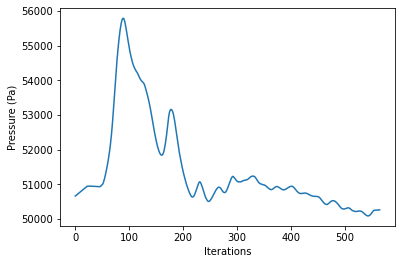

In [63]:
plt.plot(pressure)
plt.xlabel("Iterations")
plt.ylabel("Pressure (Pa)")



Text(0, 0.5, 'Temperature (K)')

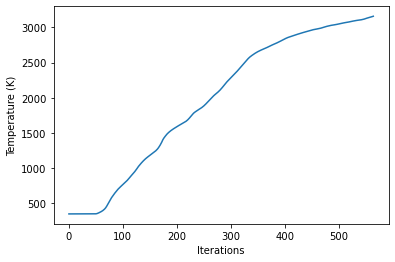

In [64]:
plt.plot(temperature)
plt.xlabel("Iterations")
plt.ylabel("Temperature (K)")

Text(0, 0.5, 'Mass Inflow [kg/s]')

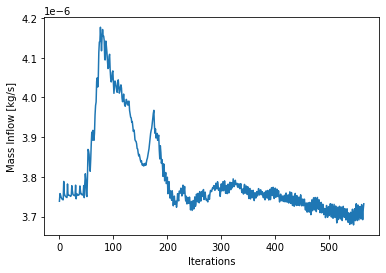

In [65]:
plt.plot(min_dot)
plt.xlabel("Iterations")
plt.ylabel("Mass Inflow [kg/s]")

Text(0, 0.5, 'Mass Outflow [kg/s]')

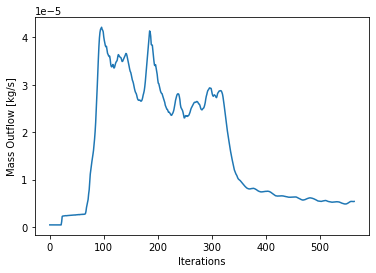

In [66]:
plt.plot(mout_dot)
plt.xlabel("Iterations")
plt.ylabel("Mass Outflow [kg/s]")

Text(0, 0.5, 'Total Mass (kg)')

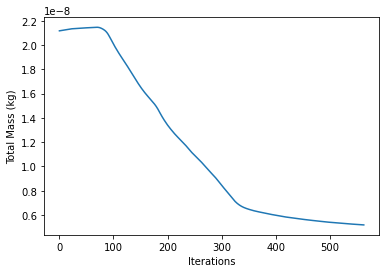

In [51]:
plt.plot(mass)
plt.xlabel("Iterations")
plt.ylabel("Total Mass (kg)")